In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')



In [2]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Census%20Income/Census%20Income.csv')
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [3]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [4]:
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [5]:
df.Income.value_counts(normalize=True)

# almost 76% of the population earn less than equal to 50K
# 24% of the population earns more than 50K

 <=50K    0.759183
 >50K     0.240817
Name: Income, dtype: float64

In [6]:
df = df.drop_duplicates(keep = 'first')
df.shape

# deleting the duplicte values and keeping only the first one

(32536, 15)

In [7]:
df.Age.value_counts()

36    898
31    888
34    886
23    876
33    875
     ... 
83      6
88      3
85      3
86      1
87      1
Name: Age, Length: 73, dtype: int64

In [8]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [10]:
df.Workclass.value_counts()

 Private             22673
 Self-emp-not-inc     2540
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64

In [11]:
df[df == '?'] = np.nan

In [12]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K


In [13]:
# This Code will Count the occuring of the '?' in all the columns
for i in df.columns:
    t = df[i].value_counts()
    index = list(t.index)
    print ("The Value Counts of ? in", i)
    for i in index:
        temp = 0
        if i == '?':
            print (t['?'])
            temp = 1
            break
    if temp == 0:
        print ("0")

The Value Counts of ? in Age
0
The Value Counts of ? in Workclass
0
The Value Counts of ? in Fnlwgt
0
The Value Counts of ? in Education
0
The Value Counts of ? in Education_num
0
The Value Counts of ? in Marital_status
0
The Value Counts of ? in Occupation
0
The Value Counts of ? in Relationship
0
The Value Counts of ? in Race
0
The Value Counts of ? in Sex
0
The Value Counts of ? in Capital_gain
0
The Value Counts of ? in Capital_loss
0
The Value Counts of ? in Hours_per_week
0
The Value Counts of ? in Native_country
0
The Value Counts of ? in Income
0


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32536 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32536 non-null  int64 
 1   Workclass       32536 non-null  object
 2   Fnlwgt          32536 non-null  int64 
 3   Education       32536 non-null  object
 4   Education_num   32536 non-null  int64 
 5   Marital_status  32536 non-null  object
 6   Occupation      32536 non-null  object
 7   Relationship    32536 non-null  object
 8   Race            32536 non-null  object
 9   Sex             32536 non-null  object
 10  Capital_gain    32536 non-null  int64 
 11  Capital_loss    32536 non-null  int64 
 12  Hours_per_week  32536 non-null  int64 
 13  Native_country  32536 non-null  object
 14  Income          32536 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [15]:
for col_name in df.columns:
    if(df[col_name].dtype == 'object'):
        df[col_name]= df[col_name].astype('category')
        df[col_name] = df[col_name].cat.codes
# changing all object data type to integer

In [16]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,6,83311,9,13,2,4,0,4,1,0,0,13,39,0
1,38,4,215646,11,9,0,6,1,4,1,0,0,40,39,0
2,53,4,234721,1,7,2,6,0,2,1,0,0,40,39,0
3,28,4,338409,9,13,2,10,5,2,0,0,0,40,5,0
4,37,4,284582,12,14,2,4,5,4,0,0,0,40,39,0


In [17]:
df.dtypes

Age               int64
Workclass          int8
Fnlwgt            int64
Education          int8
Education_num     int64
Marital_status     int8
Occupation         int8
Relationship       int8
Race               int8
Sex                int8
Capital_gain      int64
Capital_loss      int64
Hours_per_week    int64
Native_country     int8
Income             int8
dtype: object

In [18]:
cor=df.corr()
cor

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
Age,1.000000,0.003781,-0.076448,-0.010551,0.036224,-0.266142,-0.020911,-0.263744,0.029116,0.088708,0.077676,0.057745,0.068515,-0.001524,0.234039
Workclass,0.003781,1.000000,-0.016532,0.023480,0.052099,-0.064828,0.255105,-0.090421,0.049717,0.095960,0.033845,0.012255,0.139059,-0.007697,0.051706
Fnlwgt,-0.076448,-0.016532,1.000000,-0.028065,-0.043353,0.028154,0.001360,0.008859,-0.021484,0.027113,0.000433,-0.010267,-0.018900,-0.051866,-0.009521
Education,-0.010551,0.023480,-0.028065,1.000000,0.359105,-0.038413,-0.021249,-0.011060,0.014307,-0.027426,0.030086,0.016790,0.055991,0.063874,0.079361
Education_num,0.036224,0.052099,-0.043353,0.359105,1.000000,-0.069196,0.109804,-0.094424,0.031998,0.012181,0.122661,0.079901,0.148426,0.050127,0.335299
Marital_status,-0.266142,-0.064828,0.028154,-0.038413,-0.069196,1.000000,-0.009778,0.185542,-0.067942,-0.129425,-0.043373,-0.034134,-0.190433,-0.023414,-0.199187
Occupation,-0.020911,0.255105,0.001360,-0.021249,0.109804,-0.009778,1.000000,-0.075600,0.006811,0.080532,0.025513,0.017977,0.080502,-0.012394,0.075398
Relationship,-0.263744,-0.090421,0.008859,-0.011060,-0.094424,0.185542,-0.075600,1.000000,-0.116048,-0.582593,-0.057945,-0.061100,-0.248876,-0.005634,-0.250955
Race,0.029116,0.049717,-0.021484,0.014307,0.031998,-0.067942,0.006811,-0.116048,1.000000,0.087464,0.011152,0.018916,0.041921,0.137847,0.071855
Sex,0.088708,0.095960,0.027113,-0.027426,0.012181,-0.129425,0.080532,-0.582593,0.087464,1.000000,0.048486,0.045576,0.229190,-0.008262,0.215984


<Axes: >

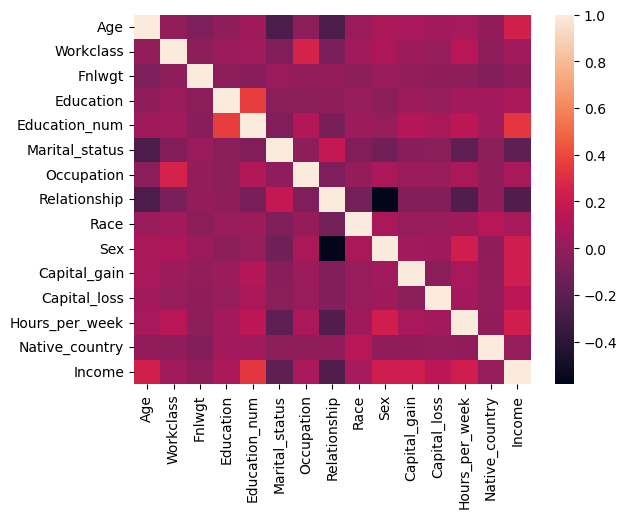

In [19]:
sns.heatmap(cor)

In [20]:
cor['Income'].sort_values(ascending=False)

Income            1.000000
Education_num     0.335299
Age               0.234039
Hours_per_week    0.229659
Capital_gain      0.223340
Sex               0.215984
Capital_loss      0.150498
Education         0.079361
Occupation        0.075398
Race              0.071855
Workclass         0.051706
Native_country    0.015623
Fnlwgt           -0.009521
Marital_status   -0.199187
Relationship     -0.250955
Name: Income, dtype: float64

In [21]:
df.skew()

Age                0.557657
Workclass         -0.751854
Fnlwgt             1.447695
Education         -0.934180
Education_num     -0.309454
Marital_status    -0.012692
Occupation         0.114542
Relationship       0.786514
Race              -2.435283
Sex               -0.719400
Capital_gain      11.949245
Capital_loss       4.592622
Hours_per_week     0.228752
Native_country    -3.661060
Income             1.211640
dtype: float64

In [22]:
from scipy.stats import zscore
z_score=zscore(df[['Workclass', 'Fnlwgt', 'Education', 'Race', 'Sex', 'Capital_gain', 'Capital_loss', 'Native_country', 'Income' ]])
abs_z_score= np.abs(z_score)                   
filter_entry= (abs_z_score <3).all(axis=1)
df= df[filter_entry]
df.reset_index(inplace=True)

In [23]:
df.skew()

index              0.001548
Age                0.560334
Workclass         -0.747962
Fnlwgt             0.623887
Education         -0.943767
Education_num     -0.276196
Marital_status    -0.030020
Occupation         0.130325
Relationship       0.760824
Race              -2.601160
Sex               -0.694966
Capital_gain       4.943070
Capital_loss      29.454628
Hours_per_week     0.217227
Native_country    -5.258334
Income             1.327763
dtype: float64

In [24]:
for index in df.skew().index:
    if df.skew().loc[index] > 0.5:
        df[index] = np.cbrt(df[index])
        if df.skew().loc[index] < -0.5 :
            df[index] = np.square(df[index])

In [25]:
df.skew()

index              0.001548
Age                0.098010
Workclass         -0.747962
Fnlwgt            -0.385128
Education         -0.943767
Education_num     -0.276196
Marital_status    -0.030020
Occupation         0.130325
Relationship      -0.125610
Race              -2.601160
Sex               -0.694966
Capital_gain       3.370978
Capital_loss      25.464318
Hours_per_week     0.217227
Native_country    -5.258334
Income             1.328125
dtype: float64

In [26]:
df.drop(['Fnlwgt', 'Marital_status', 'Relationship'], axis=1,inplace=True)
# deleting colums with no correlation

In [27]:
x=df.drop('Income', axis=1)
y=df['Income']
# splitting the data into label and features

In [28]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=pd.DataFrame(scaler.fit_transform(x), columns=x.columns)
x

,index,Age,Workclass,Education,Education_num,Occupation,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country
0,-1.733334,0.891688,1.464343,-0.335521,1.201765,-0.598635,0.343260,0.711182,-0.288523,-0.040047,-2.211132,0.200688
1,-1.733228,0.087627,0.093299,0.177575,-0.407079,-0.127369,0.343260,0.711182,-0.288523,-0.040047,-0.021028,0.200688
2,-1.733121,1.072081,0.093299,-2.387904,-1.211501,-0.127369,-2.969755,0.711182,-0.288523,-0.040047,-0.021028,0.200688
3,-1.732908,0.013342,0.093299,0.434123,1.603976,-0.598635,0.343260,-1.406111,-0.288523,-0.040047,-0.021028,0.200688
4,-1.732802,0.829956,0.093299,-1.105165,-2.015923,0.343897,-2.969755,-1.406111,-0.288523,-0.040047,-1.967787,-5.505992
...,...,...,...,...,...,...,...,...,...,...,...,...
28004,1.734792,-0.816099,0.093299,-0.848617,0.799554,1.522062,0.343260,-1.406111,-0.288523,-0.040047,-0.183258,0.200688
28005,1.734899,0.232374,0.093299,0.177575,-0.407079,0.108264,0.343260,0.711182,-0.288523,-0.040047,-0.021028,0.200688
28006,1.735005,1.358175,0.093299,0.177575,-0.407079,-1.305534,0.343260,-1.406111,-0.288523,-0.040047,-0.021028,0.200688
28007,1.735112,-1.310338,0.093299,0.177575,-0.407079,-1.305534,0.343260,0.711182,-0.288523,-0.040047,-1.643328,0.200688


In [29]:
y.value_counts()

0.0    21750
1.0     6259
Name: Income, dtype: int64

In [30]:
!pip install imblearn
from imblearn.over_sampling import SMOTE
SM=SMOTE()
x1,y1= SM.fit_resample(x,y)

In [31]:
y1.value_counts()

0.0    21750
1.0    21750
Name: Income, dtype: int64

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
maxAccu=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test= train_test_split(x1,y1,test_size=0.30, random_state=i)
    RFR= RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred= RFR.predict(x_test)
    acc= accuracy_score(y_test, pred)
    if acc>maxAccu:
        maxAccu= acc
        maxRs= i
print('Best Accuracy is:',maxAccu, 'at random_state',maxRs)

Best Accuracy is: 0.885823754789272 at random_state 151


In [33]:
# creating Train, Test Split:
x_train,x_test,y_train,y_test= train_test_split(x,y,test_size=0.30,random_state=maxRs)

In [34]:
# CLASSIFIACTION ALGORITHMS:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, BaggingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score

In [35]:
# RandomForest Classifier:
RFC= RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.8329168154230632
[[6044  441]
 [ 963  955]]
              precision    recall  f1-score   support

         0.0       0.86      0.93      0.90      6485
         1.0       0.68      0.50      0.58      1918

    accuracy                           0.83      8403
   macro avg       0.77      0.71      0.74      8403
weighted avg       0.82      0.83      0.82      8403



In [36]:
#Logistic Regression
LR= LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.8213733190527193
[[6131  354]
 [1147  771]]
              precision    recall  f1-score   support

         0.0       0.84      0.95      0.89      6485
         1.0       0.69      0.40      0.51      1918

    accuracy                           0.82      8403
   macro avg       0.76      0.67      0.70      8403
weighted avg       0.81      0.82      0.80      8403



In [37]:
# Support Vector Machine Classifier:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))


0.8385100559324051
[[6254  231]
 [1126  792]]
              precision    recall  f1-score   support

         0.0       0.85      0.96      0.90      6485
         1.0       0.77      0.41      0.54      1918

    accuracy                           0.84      8403
   macro avg       0.81      0.69      0.72      8403
weighted avg       0.83      0.84      0.82      8403



In [38]:
# GradientBoosting Classifier:
GB=GradientBoostingClassifier()
GB.fit(x_train,y_train)
predGB=GB.predict(x_test)
print(accuracy_score(y_test,predGB))
print(confusion_matrix(y_test,predGB))
print(classification_report(y_test,predGB))

0.8494585267166488
[[6208  277]
 [ 988  930]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      6485
         1.0       0.77      0.48      0.60      1918

    accuracy                           0.85      8403
   macro avg       0.82      0.72      0.75      8403
weighted avg       0.84      0.85      0.84      8403



In [39]:
#Adaboost Classifier:
ABC=AdaBoostClassifier()
ABC.fit(x_train,y_train)
predABC=ABC.predict(x_test)
print(accuracy_score(y_test,predABC))
print(confusion_matrix(y_test,predABC))
print(classification_report(y_test,predABC))

0.8452933476139474
[[6217  268]
 [1032  886]]
              precision    recall  f1-score   support

         0.0       0.86      0.96      0.91      6485
         1.0       0.77      0.46      0.58      1918

    accuracy                           0.85      8403
   macro avg       0.81      0.71      0.74      8403
weighted avg       0.84      0.85      0.83      8403



In [40]:
#Bagging Classifier:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
predBG=BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

0.8253004879209807
[[6063  422]
 [1046  872]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6485
         1.0       0.67      0.45      0.54      1918

    accuracy                           0.83      8403
   macro avg       0.76      0.69      0.72      8403
weighted avg       0.81      0.83      0.81      8403



In [41]:
#Bagging Classifier:
BG=BaggingClassifier()
BG.fit(x_train,y_train)
predBG=BG.predict(x_test)
print(accuracy_score(y_test,predBG))
print(confusion_matrix(y_test,predBG))
print(classification_report(y_test,predBG))

0.8258955135070808
[[6054  431]
 [1032  886]]
              precision    recall  f1-score   support

         0.0       0.85      0.93      0.89      6485
         1.0       0.67      0.46      0.55      1918

    accuracy                           0.83      8403
   macro avg       0.76      0.70      0.72      8403
weighted avg       0.81      0.83      0.81      8403



In [42]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.8245864572176603
[[5979  506]
 [ 968  950]]
              precision    recall  f1-score   support

         0.0       0.86      0.92      0.89      6485
         1.0       0.65      0.50      0.56      1918

    accuracy                           0.82      8403
   macro avg       0.76      0.71      0.73      8403
weighted avg       0.81      0.82      0.82      8403



In [44]:
# cross validation (CV) score: for Gradient Boost
from sklearn.model_selection import cross_val_score
score=cross_val_score(GB,x1,y1)
print(score)
print(score.mean())
print('Difference between Accuracy score and Cross Validation is-', accuracy_score(y_test,predGB)-score.mean())

[0.3716092  0.52241379 0.61264368 0.57436782 0.42804598]
0.5018160919540231
Difference between Accuracy score and Cross Validation is- 0.3476424347626257


In [45]:
from sklearn.model_selection import GridSearchCV
parameters={'criterion':['gini', 'entrophy'], 'random_state': [10,50,100], 'max_depth': [0,10,20], 'n_jobs': [-2,-1,1], 'n_estimators': [50,100,200,300]}

In [46]:
GCV=GridSearchCV(GradientBoostingClassifier(), parameters, cv=5)

In [47]:
GCV.fit(x_train,y_train)

ValueError: Invalid parameter 'n_jobs' for estimator GradientBoostingClassifier(criterion='gini', max_depth=0, n_estimators=50). Valid parameters are: ['ccp_alpha', 'criterion', 'init', 'learning_rate', 'loss', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'n_estimators', 'n_iter_no_change', 'random_state', 'subsample', 'tol', 'validation_fraction', 'verbose', 'warm_start'].